In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('MBA.csv')

In [36]:
df.info

<bound method DataFrame.info of       application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business       NaN   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business       NaN   
6192            6193    Male           True  3.36    Business       NaN   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     620.

In [37]:
df['admission'].replace(np.nan, 'Not admitted', inplace=True)

In [38]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Not admitted
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Not admitted
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Not admitted


In [39]:
# Deixando  0 = Not admitted, 1 = Admitted e 2 = Waitlisted
df['admission'].replace('Not admitted', 0, inplace=True)
df['admission'].replace('Admit', 1, inplace=True)
df['admission'].replace('Waitlist', 2, inplace=True)

In [40]:
df.count()

application_id    6194
gender            6194
international     6194
gpa               6194
major             6194
race              4352
gmat              6194
work_exp          6194
work_industry     6194
admission         6194
dtype: int64

In [41]:
# Verificando nulls
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission            0
dtype: int64

In [42]:
# Removendo colunas que não serão utilizadas
df.drop(['gender', 'race'], inplace=True, axis=1)

In [43]:
# Label encoding no major e no work_industry
df = pd.get_dummies(df, columns=['major', 'work_industry'], prefix=['major', 'work_industry'])

<Axes: >

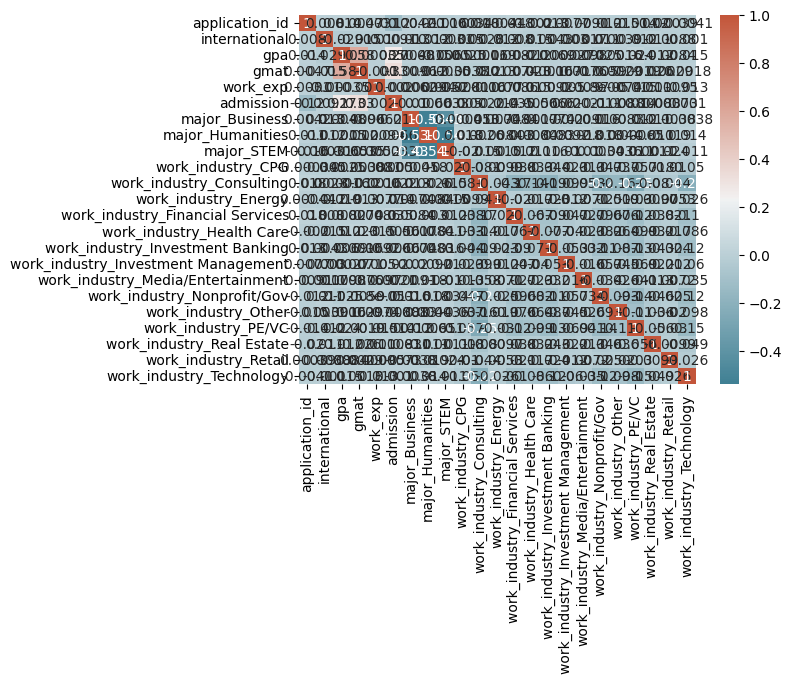

In [44]:
# matriz de correlação
corr = df.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [45]:
# Modelo de classificação random forest multiclasse
from sklearn.model_selection import train_test_split

X = df.drop('admission', axis=1)
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy:  0.8240516545601292
[[992  32   1]
 [167  29   0]
 [ 16   2   0]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1025
           1       0.46      0.15      0.22       196
           2       0.00      0.00      0.00        18

    accuracy                           0.82      1239
   macro avg       0.43      0.37      0.38      1239
weighted avg       0.77      0.82      0.78      1239



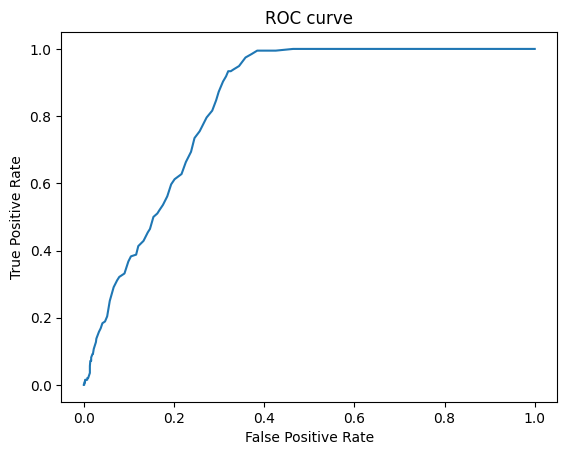

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Curva ROC
y_pred_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [47]:
# Export do modelo
import pickle
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [49]:
# exportando as features para serem usadas no servidor Flask para o modelo
features = X.columns
pickle.dump(features, open('features.pkl', 'wb'))
features

Index(['application_id', 'international', 'gpa', 'gmat', 'work_exp',
       'major_Business', 'major_Humanities', 'major_STEM', 'work_industry_CPG',
       'work_industry_Consulting', 'work_industry_Energy',
       'work_industry_Financial Services', 'work_industry_Health Care',
       'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology'],
      dtype='object')